In [1]:
import pandas as pd

In [10]:
path='C:\\Users\dmckenzie\OneDrive - DLR Group\Documents\Public_Schools.xlsx'
path2='C:\\Users\dmckenzie\OneDrive - DLR Group\Documents\DLRGroup_HighSchools.csv'
path3='C:\\Users\dmckenzie\OneDrive - DLR Group\Documents\\acgr-sch-sy2017-18.csv'

In [5]:
Schools=pd.read_excel(path)

In [9]:
DLRschools=pd.read_csv(path2)

In [52]:
schoolgradrates=pd.read_csv(path3)

In [53]:
schoolgradrates['ALL_RATE_17182']=schoolgradrates['ALL_RATE_1718'].str.replace('GE','').\
            str.replace('PS','').\
            str.replace('LE','').\
            str.replace('LT','')

In [54]:
schoolgradrates=schoolgradrates[schoolgradrates['ALL_RATE_17182']!='']

In [55]:
schoolgradrates['ALL_RATE_17182']=schoolgradrates['ALL_RATE_17182'].str.split('-').str[0]

<AxesSubplot:ylabel='Density'>

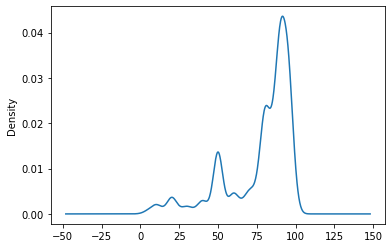

In [155]:
schoolgradrates['ALL_RATE_17182'].astype(int).plot.kde()

<AxesSubplot:>

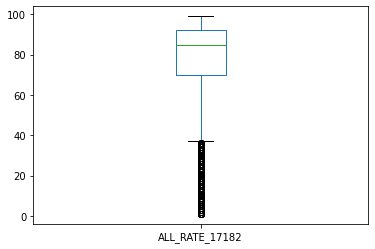

In [151]:
schoolgradrates['ALL_RATE_17182'].astype(int).plot(kind='box')

In [73]:
DLRschools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sector                 45 non-null     object 
 1   ProjectKey             45 non-null     int64  
 2   Project ID             45 non-null     object 
 3   Project Name           45 non-null     object 
 4   Business Partner Name  45 non-null     object 
 5   Project Address        33 non-null     object 
 6   Project Address 2      4 non-null      object 
 7   Project Address 3      0 non-null      float64
 8   Project City           45 non-null     object 
 9   Project State          45 non-null     object 
 10  Project Zip            33 non-null     float64
 11  SQ1 Project URL        45 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.3+ KB


In [85]:
import numpy as np

In [87]:
DLRschools['Project Address']=np.where(DLRschools['Project Address 2'].isna()==False,DLRschools['Project Address 2'],DLRschools['Project Address'])

In [203]:
DLRschools['Adress2']=(DLRschools['Project Address']+' '+DLRschools['Project State']+' '+DLRschools['Project City']).str.lower().str.replace('.','').str.replace('-',' ')

In [204]:
Schools['ADDRESS2']=(Schools['ADDRESS']+" "+Schools['STATE']+" "+Schools['CITY']).str.lower().str.replace('.','').str.replace('-',' ')

In [238]:
Schools2=Schools.set_index('NCESID').join(schoolgradrates[['NCESSCH','ALL_RATE_17182']].set_index('NCESSCH'),how='inner').reset_index()

In [206]:
from_list =DLRschools[DLRschools['Adress2'].isna()==False].drop_duplicates(subset=['Business Partner Name'])['Adress2'].to_list()
two_list=Schools2[Schools2['ADDRESS2'].isna()==False].drop_duplicates(subset=['ADDRESS2'])['ADDRESS2'].to_list()

In [207]:
len(two_list)

21126

In [212]:
from polyfuzz.models import TFIDF
from polyfuzz import PolyFuzz

tfidf = TFIDF(n_gram_range=(1, 3))
model = PolyFuzz(tfidf)
model.match(from_list, two_list)

In [213]:
model.get_matches().sort_values('Similarity',ascending=False)

,From,To,Similarity
17,23499 se tahoma way wa maple valley,23499 se tahoma way wa maple valley,1.000000
3,16610 bennington road ne bennington,16610 bennington road ne bennington,1.000000
6,7111 aurora avenue ia urbandale,7111 aurora avenue ia urbandale,1.000000
7,204 n league rd ia colfax,204 n league rd ia colfax,1.000000
9,13260 switzer road ks overland park,13260 switzer road ks overland park,1.000000
21,20167 grim rd ne or aurora,20167 grim rd ne or aurora,1.000000
20,1130 sw queen ave or albany,1130 queen ave sw or albany,1.000000
25,11725 donner pass road ca truckee,11725 donner pass rd ca truckee,0.967004
29,2401 e baristo road ca palm springs,2401 e baristo rd ca palm springs,0.957625
28,15615 e nelson avenue ca la puente,15615 e nelson ave ca la puente,0.948358


In [214]:
matchdf=model.get_matches().sort_values('Similarity',ascending=False)

In [218]:
dlrmatched=matchdf[matchdf['Similarity']>=.7].set_index('To').join(Schools2.set_index('ADDRESS2')[['ALL_RATE_17182','']])

In [219]:
len(dlrmatched)

22

In [240]:
DLRschools2=DLRschools[DLRschools['Adress2'].isna()==False].\
    drop_duplicates(subset=['Business Partner Name']).\
    set_index('Adress2').join(dlrmatched.\
                              set_index('From'),
                              how='inner').\
    reset_index()

In [242]:
schoolgradrates['ALL_RATE_17182'].astype(int).median()

85.0

In [243]:
DLRschools2['ALL_RATE_17182'].astype(int).median()

90.0

(0.0, 100.0)

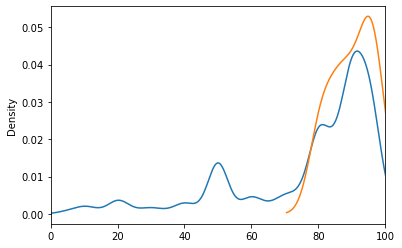

In [258]:
schoolgradrates['ALL_RATE_17182'].astype(int).plot.kde()
DLRschools2['ALL_RATE_17182'].astype(int).plot.kde().set_xlim(0,100)

In [263]:
DLRschools2.to_csv('C:\\Users\dmckenzie\OneDrive - DLR Group\Documents\DLR School Grad Rates.csv')

In [297]:
from plotnine import ggplot,aes,geom_density,theme_bw,ggtitle,geom_boxplot,coord_flip,xlab

In [268]:
schoolgradrates['ALL_RATE_17182']=schoolgradrates['ALL_RATE_17182'].astype(int)

In [270]:
DLRschools2['ALL_RATE_17182']=DLRschools2['ALL_RATE_17182'].astype(int)

In [285]:
grads=pd.DataFrame({'Grad Rate':schoolgradrates['ALL_RATE_17182'],'Type':'All High Schools'}).\
    append(pd.DataFrame({'Grad Rate':DLRschools2['ALL_RATE_17182'],'Type':'High Schools With DLR Design'}))

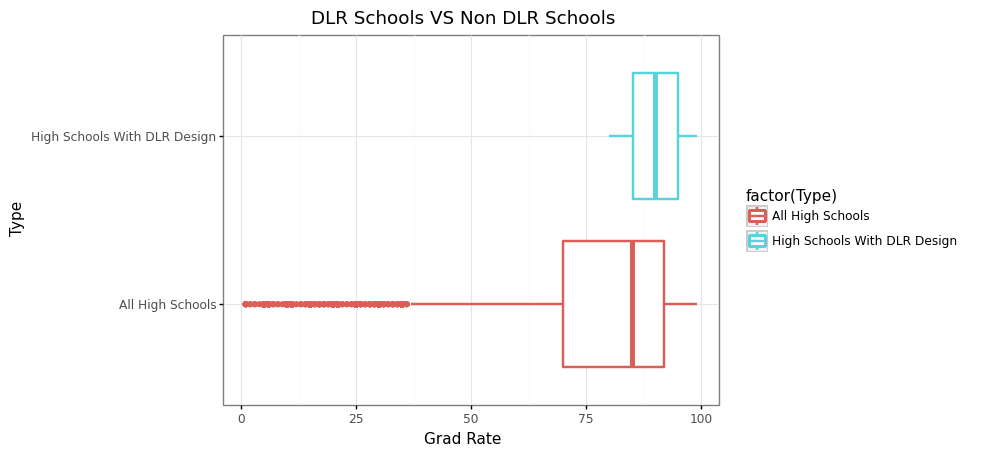

<ggplot: (-9223371889587830944)>

In [298]:
(ggplot(grads, aes(x='factor(Type)',y='Grad Rate', color='factor(Type)'))+
     geom_boxplot(size=1)+
     theme_bw()+ggtitle('DLR Schools VS Non DLR Schools')+coord_flip()+xlab('Type'))

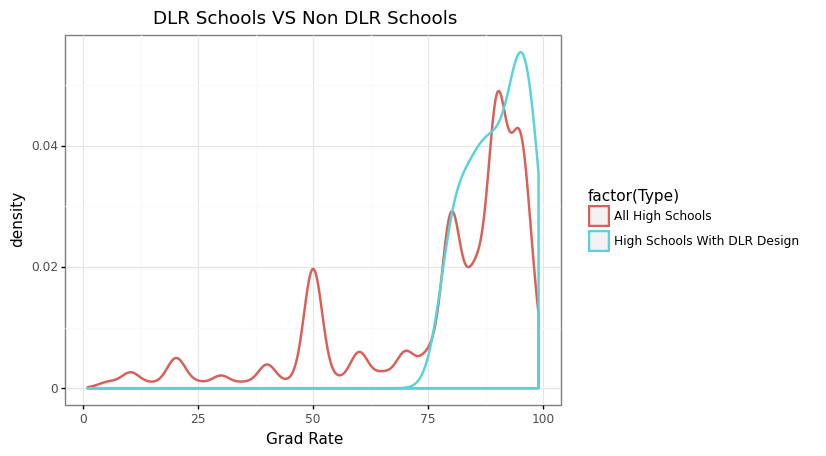

<ggplot: (-9223371889585633352)>

In [292]:
(ggplot(grads, aes(x='Grad Rate', color='factor(Type)'))+
     geom_density(size=1)+
     theme_bw()+ggtitle('DLR Schools VS Non DLR Schools'))

In [264]:
schoolgradrates[['NCESSCH','ALL_RATE_17182']].to_csv('C:\\Users\dmckenzie\OneDrive - DLR Group\Documents\School Grad Rates.csv')

In [299]:
#

In [300]:
#

In [301]:
#

In [302]:
#

In [303]:
#

In [304]:
#circle -> cir
#street -> st
#north ->
#avenue -> ave
#streets ->st